In [1]:
# import necessary library
import pandas as pd
import math
import seaborn as sns
from matplotlib import pyplot as plt
import re
import numpy as np
import geopandas as gpd
from shapely.geometry import Point # Point class
from shapely.geometry import shape

C:\Users\mmmiah\AppData\Local\ESRI\conda\envs\geo_env\Lib\site-packages\geopandas\_compat.py:123: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_17936\239884798.py:8: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https

In [2]:
# surpres all warning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
# avoid unecessary zeros after interger year
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format

In [4]:
# Read eco data
# read the eco_data
df1=pd.read_csv('C:/UC Berkeley Project Backup/Bike_ped Exposure Model Project/Eco_data/eco2019_hourly.csv')
df2=pd.read_csv('C:/UC Berkeley Project Backup/Bike_ped Exposure Model Project/Eco_data/eco2018_hourly.csv')
df3=pd.read_csv('C:/UC Berkeley Project Backup/Bike_ped Exposure Model Project/Eco_data/eco2017_hourly.csv')
df4=pd.read_csv('C:/UC Berkeley Project Backup/Bike_ped Exposure Model Project/Eco_data/eco2015_2016_hourly.csv')

C:\Users\Md Mintu Miah\AppData\Local\Temp\ipykernel_14292\4147453506.py:3: DtypeWarning: Columns (12,13,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df1=pd.read_csv('C:/UC Berkeley Project Backup/Bike_ped Exposure Model Project/Eco_data/eco2019_hourly.csv')
C:\Users\Md Mintu Miah\AppData\Local\Temp\ipykernel_14292\4147453506.py:4: DtypeWarning: Columns (12,13,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df2=pd.read_csv('C:/UC Berkeley Project Backup/Bike_ped Exposure Model Project/Eco_data/eco2018_hourly.csv')
C:\Users\Md Mintu Miah\AppData\Local\Temp\ipykernel_14292\4147453506.py:5: DtypeWarning: Columns (12,13,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df3=pd.read_csv('C:/UC Berkeley Project Backup/Bike_ped Exposure Model Project/Eco_data/eco2017_hourly.csv')
C:\Users\Md Mintu Miah\AppData\Local\Temp\ipykernel_14292\4147453506.py:6: DtypeWarning: Columns (12,13

In [5]:
# Combine the data
df18i=pd.concat([df1,df2,df3,df4],axis=0)
df18i.head()

,Unnamed: 0,date,isoDate,counts,status,id,site_name,channel_name,latitude,longitude,direction,type,installationDate,counter,interval,city,state,country2
0,0,2019-01-01T00:00:00+0000,2019-01-01T00:00:00-0800,0.00,0.00,103000671,BART AT SPIRE,BART at Spire- Bikes IN to Spire,37.79,-122.46,1,real,2010-12-23T00:00:00-0800,X0412011792,60,San Francisco,California,United States
1,1,2019-01-01T01:00:00+0000,2019-01-01T01:00:00-0800,0.00,0.00,103000671,BART AT SPIRE,BART at Spire- Bikes IN to Spire,37.79,-122.46,1,real,2010-12-23T00:00:00-0800,X0412011792,60,San Francisco,California,United States
2,2,2019-01-01T02:00:00+0000,2019-01-01T02:00:00-0800,0.00,0.00,103000671,BART AT SPIRE,BART at Spire- Bikes IN to Spire,37.79,-122.46,1,real,2010-12-23T00:00:00-0800,X0412011792,60,San Francisco,California,United States
3,3,2019-01-01T03:00:00+0000,2019-01-01T03:00:00-0800,0.00,0.00,103000671,BART AT SPIRE,BART at Spire- Bikes IN to Spire,37.79,-122.46,1,real,2010-12-23T00:00:00-0800,X0412011792,60,San Francisco,California,United States
4,4,2019-01-01T04:00:00+0000,2019-01-01T04:00:00-0800,0.00,0.00,103000671,BART AT SPIRE,BART at Spire- Bikes IN to Spire,37.79,-122.46,1,real,2010-12-23T00:00:00-0800,X0412011792,60,San Francisco,California,United States


In [6]:
# collapse the date column
df18i[[ "Date","Start Time1"]] = df18i["isoDate"].str.split("T", expand = True)
df18i[[ "Start Time","Time Zone"]] = df18i["Start Time1"].str.split("-", expand = True)
df18i.head()

,Unnamed: 0,date,isoDate,counts,status,id,site_name,channel_name,latitude,longitude,...,installationDate,counter,interval,city,state,country2,Date,Start Time1,Start Time,Time Zone
0,0,2019-01-01T00:00:00+0000,2019-01-01T00:00:00-0800,0.00,0.00,103000671,BART AT SPIRE,BART at Spire- Bikes IN to Spire,37.79,-122.46,...,2010-12-23T00:00:00-0800,X0412011792,60,San Francisco,California,United States,2019-01-01,00:00:00-0800,00:00:00,0800
1,1,2019-01-01T01:00:00+0000,2019-01-01T01:00:00-0800,0.00,0.00,103000671,BART AT SPIRE,BART at Spire- Bikes IN to Spire,37.79,-122.46,...,2010-12-23T00:00:00-0800,X0412011792,60,San Francisco,California,United States,2019-01-01,01:00:00-0800,01:00:00,0800
2,2,2019-01-01T02:00:00+0000,2019-01-01T02:00:00-0800,0.00,0.00,103000671,BART AT SPIRE,BART at Spire- Bikes IN to Spire,37.79,-122.46,...,2010-12-23T00:00:00-0800,X0412011792,60,San Francisco,California,United States,2019-01-01,02:00:00-0800,02:00:00,0800
3,3,2019-01-01T03:00:00+0000,2019-01-01T03:00:00-0800,0.00,0.00,103000671,BART AT SPIRE,BART at Spire- Bikes IN to Spire,37.79,-122.46,...,2010-12-23T00:00:00-0800,X0412011792,60,San Francisco,California,United States,2019-01-01,03:00:00-0800,03:00:00,0800
4,4,2019-01-01T04:00:00+0000,2019-01-01T04:00:00-0800,0.00,0.00,103000671,BART AT SPIRE,BART at Spire- Bikes IN to Spire,37.79,-122.46,...,2010-12-23T00:00:00-0800,X0412011792,60,San Francisco,California,United States,2019-01-01,04:00:00-0800,04:00:00,0800


In [7]:
# create day, month, year and weekday and weekend identifier
df18i['Date'] = pd.to_datetime(df18i['Date'], errors='coerce')
df18i['date'] = df18i['Date'].dt.strftime('%Y-%m-%d')

df18i['month'] = df18i['Date'].dt.month
df18i['year'] = df18i['Date'].dt.year
df18i['day'] = df18i['Date'].dt.day
df18i['weekno']=df18i['Date'].dt.week
#in day of week Monday=0 and sunday=6
df18i['dayofweek'] = df18i['Date'].dt.dayofweek
# weekday=0 and weekend=1
df18i['weekday_Status'] = np.where(df18i['dayofweek'].isin([0,1,2,3,4]),0,1)
df18i.head()

,Unnamed: 0,date,isoDate,counts,status,id,site_name,channel_name,latitude,longitude,...,Date,Start Time1,Start Time,Time Zone,month,year,day,weekno,dayofweek,weekday_Status
0,0,2019-01-01,2019-01-01T00:00:00-0800,0.00,0.00,103000671,BART AT SPIRE,BART at Spire- Bikes IN to Spire,37.79,-122.46,...,2019-01-01,00:00:00-0800,00:00:00,0800,1,2019,1,1,1,0
1,1,2019-01-01,2019-01-01T01:00:00-0800,0.00,0.00,103000671,BART AT SPIRE,BART at Spire- Bikes IN to Spire,37.79,-122.46,...,2019-01-01,01:00:00-0800,01:00:00,0800,1,2019,1,1,1,0
2,2,2019-01-01,2019-01-01T02:00:00-0800,0.00,0.00,103000671,BART AT SPIRE,BART at Spire- Bikes IN to Spire,37.79,-122.46,...,2019-01-01,02:00:00-0800,02:00:00,0800,1,2019,1,1,1,0
3,3,2019-01-01,2019-01-01T03:00:00-0800,0.00,0.00,103000671,BART AT SPIRE,BART at Spire- Bikes IN to Spire,37.79,-122.46,...,2019-01-01,03:00:00-0800,03:00:00,0800,1,2019,1,1,1,0
4,4,2019-01-01,2019-01-01T04:00:00-0800,0.00,0.00,103000671,BART AT SPIRE,BART at Spire- Bikes IN to Spire,37.79,-122.46,...,2019-01-01,04:00:00-0800,04:00:00,0800,1,2019,1,1,1,0


In [8]:
# split the eco id and bring same id regardless of direction, last four digit of eco id is same for each of the direction
v = df18i.id.astype(str)
df18i['device_number'], df18i['ID'] = v.str[:4], v.str[4:]
#Drop 2015 data
df18i=df18i.loc[df18i['year']>2015]
df18i.head()

,Unnamed: 0,date,isoDate,counts,status,id,site_name,channel_name,latitude,longitude,...,Start Time,Time Zone,month,year,day,weekno,dayofweek,weekday_Status,device_number,ID
0,0,2019-01-01,2019-01-01T00:00:00-0800,0.00,0.00,103000671,BART AT SPIRE,BART at Spire- Bikes IN to Spire,37.79,-122.46,...,00:00:00,0800,1,2019,1,1,1,0,1030,00671
1,1,2019-01-01,2019-01-01T01:00:00-0800,0.00,0.00,103000671,BART AT SPIRE,BART at Spire- Bikes IN to Spire,37.79,-122.46,...,01:00:00,0800,1,2019,1,1,1,0,1030,00671
2,2,2019-01-01,2019-01-01T02:00:00-0800,0.00,0.00,103000671,BART AT SPIRE,BART at Spire- Bikes IN to Spire,37.79,-122.46,...,02:00:00,0800,1,2019,1,1,1,0,1030,00671
3,3,2019-01-01,2019-01-01T03:00:00-0800,0.00,0.00,103000671,BART AT SPIRE,BART at Spire- Bikes IN to Spire,37.79,-122.46,...,03:00:00,0800,1,2019,1,1,1,0,1030,00671
4,4,2019-01-01,2019-01-01T04:00:00-0800,0.00,0.00,103000671,BART AT SPIRE,BART at Spire- Bikes IN to Spire,37.79,-122.46,...,04:00:00,0800,1,2019,1,1,1,0,1030,00671


In [9]:
check=df18i.loc[df18i['ID']=='44181']
check.head(4)

,Unnamed: 0,date,isoDate,counts,status,id,site_name,channel_name,latitude,longitude,...,Start Time,Time Zone,month,year,day,weekno,dayofweek,weekday_Status,device_number,ID
3854400,3854400,2019-01-01,2019-01-01T00:00:00-0800,NaN,NaN,101044181,Broadway Tunnel west of Hyde St Overpass EB,Broadway Tunnel west of Hyde St Overpass EB Ro...,37.80,-122.42,...,00:00:00,0800,1,2019,1,1,1,0,1010,44181
3854401,3854401,2019-01-01,2019-01-01T01:00:00-0800,NaN,NaN,101044181,Broadway Tunnel west of Hyde St Overpass EB,Broadway Tunnel west of Hyde St Overpass EB Ro...,37.80,-122.42,...,01:00:00,0800,1,2019,1,1,1,0,1010,44181
3854402,3854402,2019-01-01,2019-01-01T02:00:00-0800,NaN,NaN,101044181,Broadway Tunnel west of Hyde St Overpass EB,Broadway Tunnel west of Hyde St Overpass EB Ro...,37.80,-122.42,...,02:00:00,0800,1,2019,1,1,1,0,1010,44181
3854403,3854403,2019-01-01,2019-01-01T03:00:00-0800,NaN,NaN,101044181,Broadway Tunnel west of Hyde St Overpass EB,Broadway Tunnel west of Hyde St Overpass EB Ro...,37.80,-122.42,...,03:00:00,0800,1,2019,1,1,1,0,1010,44181


In [10]:
check1=df18i.loc[df18i['ID']=='01127']
check1.tail(4)

,Unnamed: 0,date,isoDate,counts,status,id,site_name,channel_name,latitude,longitude,...,Start Time,Time Zone,month,year,day,weekno,dayofweek,weekday_Status,device_number,ID
52628,52628,2016-12-31,2016-12-31T20:00:00-0800,0.00,4.00,101001127,Broadway Tunnel west of Hyde St Overpass EB (old),Broadway Tunnel west of Hyde St Overpass EB (old),37.80,-122.42,...,20:00:00,0800,12,2016,31,52,5,1,1010,01127
52629,52629,2016-12-31,2016-12-31T21:00:00-0800,0.00,4.00,101001127,Broadway Tunnel west of Hyde St Overpass EB (old),Broadway Tunnel west of Hyde St Overpass EB (old),37.80,-122.42,...,21:00:00,0800,12,2016,31,52,5,1,1010,01127
52630,52630,2016-12-31,2016-12-31T22:00:00-0800,0.00,4.00,101001127,Broadway Tunnel west of Hyde St Overpass EB (old),Broadway Tunnel west of Hyde St Overpass EB (old),37.80,-122.42,...,22:00:00,0800,12,2016,31,52,5,1,1010,01127
52631,52631,2016-12-31,2016-12-31T23:00:00-0800,0.00,4.00,101001127,Broadway Tunnel west of Hyde St Overpass EB (old),Broadway Tunnel west of Hyde St Overpass EB (old),37.80,-122.42,...,23:00:00,0800,12,2016,31,52,5,1,1010,01127


In [11]:
check['counts'].describe()

count   24488.00
mean       15.52
std        36.71
min         0.00
25%         0.00
50%         0.00
75%         3.00
max       246.00
Name: counts, dtype: float64

In [12]:
check['year'].unique()

array([2019, 2018, 2017, 2016], dtype=int64)

In [13]:
check1['counts'].describe()

count   9671.00
mean       2.47
std        3.08
min        0.00
25%        0.00
50%        2.00
75%        4.00
max       43.00
Name: counts, dtype: float64

In [14]:
check1['year'].unique()

array([2019, 2018, 2017, 2016], dtype=int64)

In [15]:
# Cpmbined the directional count by year, month, day,weekno,dayofweek,weekday_Status,  hr, lat and long, then drop the duplicate rows having same
#lat and long in the same year, then join this data with combined directional hourly count
df18=pd.DataFrame({'counts': df18i.groupby(['ID','year','month','day','weekno','dayofweek','weekday_Status','Start Time','latitude', 'longitude'])['counts'].sum()}).reset_index()
df18.head()

,ID,year,month,day,weekno,dayofweek,weekday_Status,Start Time,latitude,longitude,counts
0,00671,2016,1,1,53,4,0,00:00:00,37.79,-122.46,0.00
1,00671,2016,1,1,53,4,0,01:00:00,37.79,-122.46,0.00
2,00671,2016,1,1,53,4,0,02:00:00,37.79,-122.46,0.00
3,00671,2016,1,1,53,4,0,03:00:00,37.79,-122.46,0.00
4,00671,2016,1,1,53,4,0,04:00:00,37.79,-122.46,0.00


In [4]:
def weekday(row):
   if row['weekday_Status'] == 1:
      return 'Weekend'
   return 'Week Day'

def day_of_week(row):
   if row['dayofweek'] == 0 :
      return 'Monday'
   if row['dayofweek'] == 1 :
      return 'Tuesday'
   if row['dayofweek'] == 2 :
      return 'Wednesday'
   if row['dayofweek'] == 3 :
      return 'Thursday'
   if row['dayofweek'] == 4 :
      return 'Friday'
   if row['dayofweek'] == 5 :
      return 'Saturday'
   return 'Sunday'

In [17]:
# convert numeric day to string day of the week
df18['Day of Week']=df18.apply (lambda row: day_of_week(row), axis=1)
df18['Week Day Status']=df18.apply (lambda row: weekday(row), axis=1)
df18.head()

,ID,year,month,day,weekno,dayofweek,weekday_Status,Start Time,latitude,longitude,counts,Day of Week,Week Day Status
0,00671,2016,1,1,53,4,0,00:00:00,37.79,-122.46,0.00,Friday,Week Day
1,00671,2016,1,1,53,4,0,01:00:00,37.79,-122.46,0.00,Friday,Week Day
2,00671,2016,1,1,53,4,0,02:00:00,37.79,-122.46,0.00,Friday,Week Day
3,00671,2016,1,1,53,4,0,03:00:00,37.79,-122.46,0.00,Friday,Week Day
4,00671,2016,1,1,53,4,0,04:00:00,37.79,-122.46,0.00,Friday,Week Day


In [18]:
# rename the columne
df18=df18.rename(columns={'Start Time':'starttime'})

In [5]:
# Assign day and night
def night_day (starttime):
    if starttime=='08:00:00':
        return 'day'
    elif starttime=='09:00:00':
        return 'day'
    elif starttime=='10:00:00':
        return 'day'   
    elif starttime=='11:00:00':
        return 'day' 
    elif starttime=='12:00:00':
        return 'day'
    elif starttime=='13:00:00':
        return 'day'  
    elif starttime=='14:00:00':
        return 'day' 
    elif starttime=='15:00:00':
        return 'day'    
    elif starttime=='16:00:00':
        return 'day' 
    elif starttime=='17:00:00':
        return 'day' 
    elif starttime=='18:00:00':
        return 'day'
    elif starttime=='19:00:00':
        return 'day' 
    elif starttime=='20:00:00':
        return 'night' 
    elif starttime=='21:00:00':
        return 'night' 
    elif starttime=='22:00:00':
        return 'night'
    elif starttime=='23:00:00':
        return 'night'
    elif starttime=='24:00:00':
        return 'night'
    elif starttime=='00:00:00':
        return 'night'
    elif starttime=='01:00:00':
        return 'night'
    elif starttime=='02:00:00':
        return 'night'
    elif starttime=='03:00:00':
        return 'night'
    elif starttime=='04:00:00':
        return 'night'
    elif starttime=='05:00:00':
        return 'night'
    elif starttime=='06:00:00':
        return 'night'
    else:
        return 'night' 

In [20]:
# apply day night function
df18['day_night']=df18.apply(lambda row:night_day(row['starttime']),axis=1)

In [21]:
hour_check=pd.DataFrame({'hr_count' : df18.groupby(['ID',"year",'month','day'])["ID"].count()}).reset_index()
hour_check.head(6)

,ID,year,month,day,hr_count
0,00671,2016,1,1,24
1,00671,2016,1,2,24
2,00671,2016,1,3,24
3,00671,2016,1,4,24
4,00671,2016,1,5,24
5,00671,2016,1,6,24


In [22]:
# lets see if there is missing hour
hour_check1=hour_check.loc[hour_check['hr_count']<22]
hour_check1

,ID,year,month,day,hr_count


In [23]:
df18=df18.reset_index()

In [18]:
# save this process clean data
df18.to_csv('C:/UC Berkeley Project Backup/Bike_ped Exposure Model Project/Processed Data/Eco_combined_data_before_QA_QC.csv')

# Assign Rural and Urban groups based on location

In [24]:
ru_group=df18.drop_duplicates(subset=['ID','latitude','longitude'], keep='first')
ru_group.to_csv('C:/UC Berkeley Project Backup/Bike_ped Exposure Model Project/Processed Data/eco_counter_2019_2016_unique_location.csv')
ru_group.head()

,index,ID,year,month,day,weekno,dayofweek,weekday_Status,starttime,latitude,longitude,counts,Day of Week,Week Day Status,day_night
0,0,00671,2016,1,1,53,4,0,00:00:00,37.79,-122.46,0.00,Friday,Week Day,night
35064,35064,01127,2016,1,1,53,4,0,00:00:00,37.80,-122.42,0.00,Friday,Week Day,night
70128,70128,02415,2016,1,1,53,4,0,00:00:00,37.77,-122.44,0.00,Friday,Week Day,night
105192,105192,02691,2016,1,1,53,4,0,00:00:00,35.29,-120.66,0.00,Friday,Week Day,night
140256,140256,02692,2016,1,1,53,4,0,00:00:00,35.29,-120.66,0.00,Friday,Week Day,night


In [25]:
# combine lat and long and make it point geometry
geometry = [Point(xy) for xy in zip(ru_group.longitude, ru_group.latitude)]
#df = df.drop(['longitude', 'latitude'], axis=1)
gdf = gpd.GeoDataFrame(ru_group, crs="EPSG:4269", geometry=geometry)
gdf.head()

,index,ID,year,month,day,weekno,dayofweek,weekday_Status,starttime,latitude,longitude,counts,Day of Week,Week Day Status,day_night,geometry
0,0,00671,2016,1,1,53,4,0,00:00:00,37.79,-122.46,0.00,Friday,Week Day,night,POINT (-122.45944 37.79116)
35064,35064,01127,2016,1,1,53,4,0,00:00:00,37.80,-122.42,0.00,Friday,Week Day,night,POINT (-122.41949 37.79617)
70128,70128,02415,2016,1,1,53,4,0,00:00:00,37.77,-122.44,0.00,Friday,Week Day,night,POINT (-122.43630 37.77420)
105192,105192,02691,2016,1,1,53,4,0,00:00:00,35.29,-120.66,0.00,Friday,Week Day,night,POINT (-120.65783 35.28774)
140256,140256,02692,2016,1,1,53,4,0,00:00:00,35.29,-120.66,0.00,Friday,Week Day,night,POINT (-120.65783 35.28774)


In [26]:
# Import the CA boundary and filter the location by boundary
ca_boundary=gpd.read_file('C:/UC Berkeley Project Backup/Bike_ped Exposure Model Project/CA_Counties/CA_Counties/CA_Counties_TIGER2016.shp')
ca_boundary=ca_boundary.set_crs(epsg=3857)
ca_boundary1=ca_boundary.to_crs(epsg=4269)
ca_boundary1.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

<AxesSubplot:>

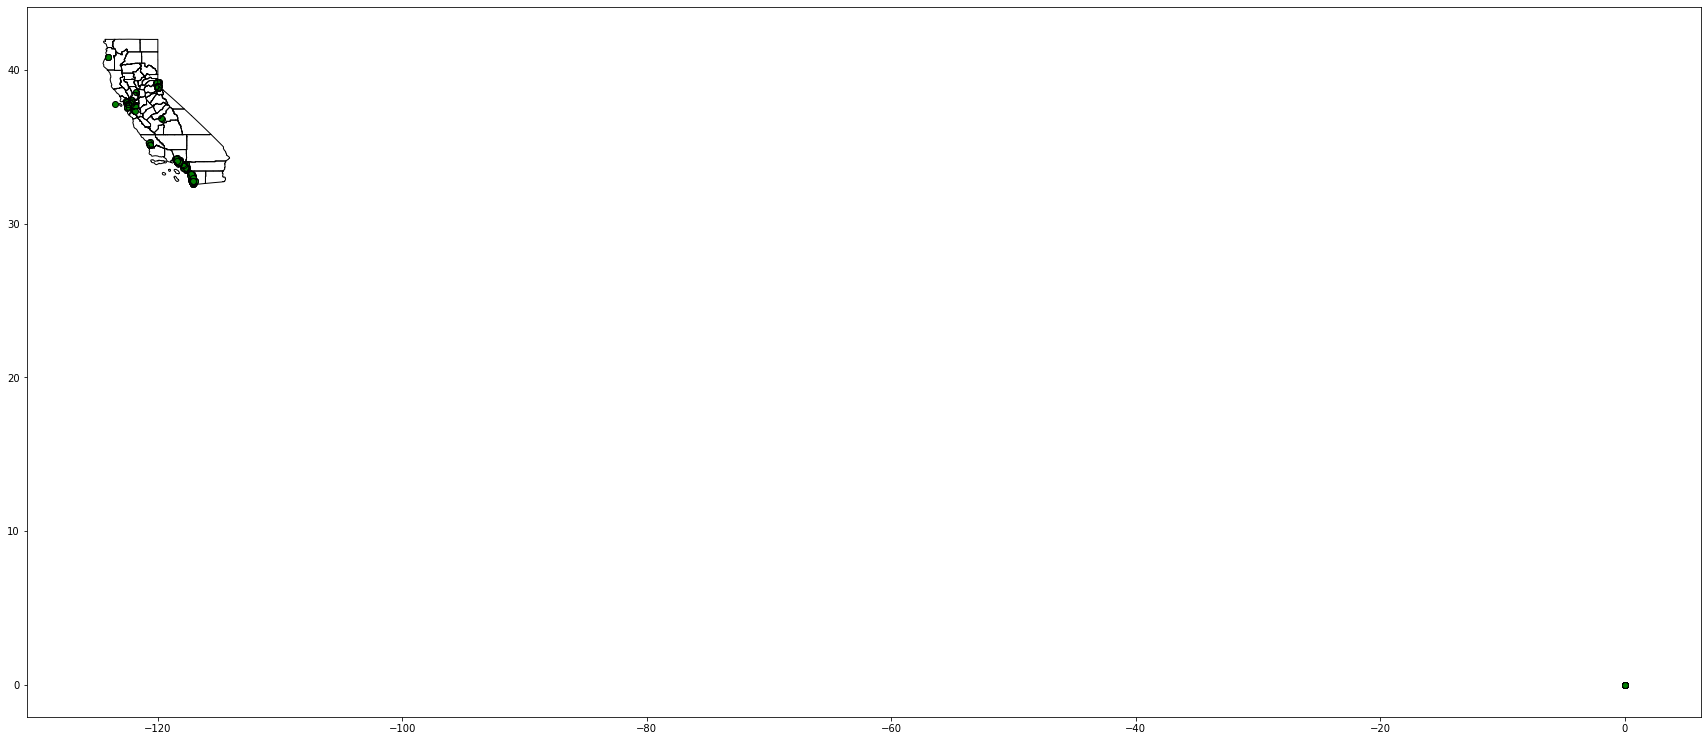

In [27]:
# visualize 
fig, ax = plt.subplots(figsize = (30,25)) 
gdf.plot(ax=ax,color="green",edgecolor='k',linewidth = 1)
ca_boundary1.plot(color="none",edgecolor='k',linewidth = 1,ax=ax) #Use your second dataframe

In [28]:
# save valid counters within the CA boundary
#gdf1=gpd.clip(gdf,ca_boundary1)
#gdf1.to_csv('D:/Bike_ped Exposure Model Project/Processed Data/eco_counter_2019_2016_corrected_location.csv')

In [29]:
# read the urban area shape file
ua=gpd.read_file('C:/UC Berkeley Project Backup/Bike_ped Exposure Model Project/Urban Area_shape file/data/2010_adjusted_urban_area.shp')
ua.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

In [30]:
# do the spatial join with eco valid counters
df19_urban=gpd.sjoin(gdf,ua)
df19_urban=df19_urban.drop(['UACE10','NAME10','UATYP10','INTPTLAT10','INTPTLON10','geometry'],axis=1)
df19_urban['location']='urban'
df19_urban.shape

(388, 17)

In [31]:
# get the counters in rural area
df20_rural = gdf.merge(df19_urban, indicator=True, how='outer').query('_merge != "both"').drop('_merge', 1)
df20_rural['location']='rural'
df20_rural.shape

(87, 18)

In [32]:
df20_rural=df20_rural.loc[df20_rural['latitude']>0]
df20_rural.shape

(30, 18)

In [33]:
# Now combine rural and urban 
df21=pd.concat([df19_urban,df20_rural],axis=0)
df21.head()

,index,ID,year,month,day,weekno,dayofweek,weekday_Status,starttime,latitude,longitude,counts,Day of Week,Week Day Status,day_night,index_right,location,geometry
0,0,00671,2016,1,1,53,4,0,00:00:00,37.79,-122.46,0.00,Friday,Week Day,night,122.00,urban,None
35064,35064,01127,2016,1,1,53,4,0,00:00:00,37.80,-122.42,0.00,Friday,Week Day,night,122.00,urban,None
70128,70128,02415,2016,1,1,53,4,0,00:00:00,37.77,-122.44,0.00,Friday,Week Day,night,122.00,urban,None
350640,350640,02735,2016,1,1,53,4,0,00:00:00,37.85,-122.26,3.00,Friday,Week Day,night,122.00,urban,None
2033712,2033712,03924,2016,1,1,53,4,0,00:00:00,37.95,-122.54,0.00,Friday,Week Day,night,122.00,urban,None


In [34]:
# we do not need all the columns as we have already those with the main data frame, we will select just id and location
df22=df21[['ID','location']]

In [35]:
# Return this location with orginal dataframe
df18=pd.merge(df18,df22, left_on=['ID'],right_on=['ID'], how='inner')
df18.shape

(14656752, 16)

In [37]:
# count rural vs urban counters by year
df18.groupby(['year', 'location'])['ID'].nunique()

year  location
2016  rural        30
      urban       388
2017  rural        30
      urban       388
2018  rural        30
      urban       388
2019  rural        30
      urban       388
Name: ID, dtype: int64

In [38]:
df18.head()

,index,ID,year,month,day,weekno,dayofweek,weekday_Status,starttime,latitude,longitude,counts,Day of Week,Week Day Status,day_night,location
0,0,00671,2016,1,1,53,4,0,00:00:00,37.79,-122.46,0.00,Friday,Week Day,night,urban
1,1,00671,2016,1,1,53,4,0,01:00:00,37.79,-122.46,0.00,Friday,Week Day,night,urban
2,2,00671,2016,1,1,53,4,0,02:00:00,37.79,-122.46,0.00,Friday,Week Day,night,urban
3,3,00671,2016,1,1,53,4,0,03:00:00,37.79,-122.46,0.00,Friday,Week Day,night,urban
4,4,00671,2016,1,1,53,4,0,04:00:00,37.79,-122.46,0.00,Friday,Week Day,night,urban


In [82]:
# save this data
# save this process clean data
df18.to_csv('C:/UC Berkeley Project Backup/Bike_ped Exposure Model Project/Processed Data/Eco_combined_data_rural_vs_urban_before_QA_QC.csv')

# run QA and QC

In [83]:
# list of criteria for QA and QC is below-
# Consecutive zeros lasting at least 48 hours
# Morning Peak (7-10 am), Early Afternoon peak (12-1 pm), and Evening Peak(5-7 pm) Hourly volume  is greater than 2,100
#  off peak time hourly volume greater than 1000
# Day time volume> nigh time volume
# Daily volume is greater than 9,000
# Consider daily counts valid if at least 22 valid hours are available.
# Consider months valid if at least one valid daily count for each day of the week (Sun-Sat).
# Consider counters “full-year” for AADBT calculation if they include 10 or more valid months of data. 

In [39]:
df18['starttime'].max()

'23:00:00+0000'

In [40]:
# Morning Peak (7-10 am), Early Afternoon peak (12-1 pm), and Evening Peak(5-7 pm) Hourly volume  is greater than 2,100
peak_data1=df18[(df18['starttime']=='07:00:00') ]
peak_data2=df18[(df18['starttime']=='08:00:00') ]
peak_data3=df18[(df18['starttime']=='09:00:00') ]
peak_data4=df18[(df18['starttime']=='12:00:00')]
peak_data5=df18[(df18['starttime']=='17:00:00')]
peak_data6=df18[(df18['starttime']=='18:00:00')]
peak_data=pd.concat([peak_data1,peak_data2,peak_data3,peak_data4,peak_data5,peak_data6],axis=0)
peak_data.head()
#df18.head()

,index,ID,year,month,day,weekno,dayofweek,weekday_Status,starttime,latitude,longitude,counts,Day of Week,Week Day Status,day_night,location
7,7,00671,2016,1,1,53,4,0,07:00:00,37.79,-122.46,0.00,Friday,Week Day,night,urban
31,31,00671,2016,1,2,53,5,1,07:00:00,37.79,-122.46,0.00,Saturday,Weekend,night,urban
55,55,00671,2016,1,3,53,6,1,07:00:00,37.79,-122.46,2.00,Sunday,Weekend,night,urban
79,79,00671,2016,1,4,1,0,0,07:00:00,37.79,-122.46,0.00,Monday,Week Day,night,urban
103,103,00671,2016,1,5,1,1,0,07:00:00,37.79,-122.46,1.00,Tuesday,Week Day,night,urban


In [42]:
# define function to flag the data
def peak_flag(Count):
    if Count> 2100:
        return 'flag'
    else:
        return 0
peak_data['Flag']=peak_data.apply(lambda row:peak_flag(row['counts']),axis=1)
peak_data.head()

,index,ID,year,month,day,weekno,dayofweek,weekday_Status,starttime,latitude,longitude,counts,Day of Week,Week Day Status,day_night,location,Flag
7,7,00671,2016,1,1,53,4,0,07:00:00,37.79,-122.46,0.00,Friday,Week Day,night,urban,0
31,31,00671,2016,1,2,53,5,1,07:00:00,37.79,-122.46,0.00,Saturday,Weekend,night,urban,0
55,55,00671,2016,1,3,53,6,1,07:00:00,37.79,-122.46,2.00,Sunday,Weekend,night,urban,0
79,79,00671,2016,1,4,1,0,0,07:00:00,37.79,-122.46,0.00,Monday,Week Day,night,urban,0
103,103,00671,2016,1,5,1,1,0,07:00:00,37.79,-122.46,1.00,Tuesday,Week Day,night,urban,0


In [43]:
# get non-peak data
non_peak_data = df18.merge(peak_data, indicator=True, how='outer').query('_merge != "both"').drop('_merge', 1)
non_peak_data.shape

(11045160, 17)

In [44]:
def off_peak_flag(Count):
    if Count> 1000:
        return 'flag'
    else:
        return 0
non_peak_data['Flag']=non_peak_data.apply(lambda row:off_peak_flag(row['counts']),axis=1)

In [45]:
# combine peak and non-peak data for next steps
hr_vol=pd.concat([peak_data,non_peak_data],axis=0)
hr_vol2=hr_vol.loc[hr_vol['Flag']==0]
hr_vol2.head()

,index,ID,year,month,day,weekno,dayofweek,weekday_Status,starttime,latitude,longitude,counts,Day of Week,Week Day Status,day_night,location,Flag
7,7,00671,2016,1,1,53,4,0,07:00:00,37.79,-122.46,0.00,Friday,Week Day,night,urban,0
31,31,00671,2016,1,2,53,5,1,07:00:00,37.79,-122.46,0.00,Saturday,Weekend,night,urban,0
55,55,00671,2016,1,3,53,6,1,07:00:00,37.79,-122.46,2.00,Sunday,Weekend,night,urban,0
79,79,00671,2016,1,4,1,0,0,07:00:00,37.79,-122.46,0.00,Monday,Week Day,night,urban,0
103,103,00671,2016,1,5,1,1,0,07:00:00,37.79,-122.46,1.00,Tuesday,Week Day,night,urban,0


In [90]:
# save this hourly clean volume
hr_vol2.to_csv('C:/UC Berkeley Project Backup/Bike_ped Exposure Model Project/Processed Data/eco_hourly_clean_volume.csv')

In [46]:
# assign duration of each hr volume
hr_vol2['duration1']=1
hr_vol2.head()

C:\Users\Md Mintu Miah\AppData\Local\Temp\ipykernel_14292\2146570183.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hr_vol2['duration1']=1


,index,ID,year,month,day,weekno,dayofweek,weekday_Status,starttime,latitude,longitude,counts,Day of Week,Week Day Status,day_night,location,Flag,duration1
7,7,00671,2016,1,1,53,4,0,07:00:00,37.79,-122.46,0.00,Friday,Week Day,night,urban,0,1
31,31,00671,2016,1,2,53,5,1,07:00:00,37.79,-122.46,0.00,Saturday,Weekend,night,urban,0,1
55,55,00671,2016,1,3,53,6,1,07:00:00,37.79,-122.46,2.00,Sunday,Weekend,night,urban,0,1
79,79,00671,2016,1,4,1,0,0,07:00:00,37.79,-122.46,0.00,Monday,Week Day,night,urban,0,1
103,103,00671,2016,1,5,1,1,0,07:00:00,37.79,-122.46,1.00,Tuesday,Week Day,night,urban,0,1


In [47]:
# apply the night condition;Day time volume> nigh time volume
#hr_vol3=pd.DataFrame({'day_night_volume': hr_vol2.groupby(['ID',"year","month",'day','Day of Week','weekno','day_night'])['Bicycle Count'].sum()}).reset_index()
hr_vol31=hr_vol2.loc[hr_vol2['day_night']=='day']
hr_vol31=pd.DataFrame({'day_volume': hr_vol31.groupby(['ID',"year","month",'day','Day of Week','weekno','day_night'])['counts'].sum()}).reset_index()
hr_vol32=hr_vol2.loc[hr_vol2['day_night']=='night']
hr_vol32=pd.DataFrame({'night_volume': hr_vol32.groupby(['ID',"year","month",'day','Day of Week','weekno','day_night'])['counts'].sum()}).reset_index()
day_night_vol=pd.merge(hr_vol32,hr_vol31,left_on=['ID',"year","month",'day','Day of Week','weekno'],right_on=['ID',"year","month",'day','Day of Week','weekno'],how='inner')
day_night_vol.head()  

,ID,year,month,day,Day of Week,weekno,day_night_x,night_volume,day_night_y,day_volume
0,00671,2016,1,1,Friday,53,night,0.00,day,56.00
1,00671,2016,1,2,Saturday,53,night,0.00,day,65.00
2,00671,2016,1,3,Sunday,53,night,2.00,day,58.00
3,00671,2016,1,4,Monday,1,night,0.00,day,12.00
4,00671,2016,1,5,Tuesday,1,night,6.00,day,12.00


In [48]:
# Now flag it
def flg(day_volume, night_volume):
    if day_volume>=night_volume:
        return 0
    else:
        return 'flag'
day_night_vol['flag']=day_night_vol.apply(lambda row:flg(row['day_volume'],row['night_volume']),axis=1)   

In [49]:
# valid data after applying the condition
day_night_vol1=day_night_vol.loc[day_night_vol['flag']==0]
day_night_vol1.shape

(600406, 11)

In [50]:
# invalid data that was flagged
day_night_vol11=day_night_vol.loc[day_night_vol['flag']=='flag']
day_night_vol11.shape

(1484, 11)

In [51]:
day_night_vol['daily_volume']=day_night_vol['night_volume']+day_night_vol['day_volume']
day_night_vol.head()

,ID,year,month,day,Day of Week,weekno,day_night_x,night_volume,day_night_y,day_volume,flag,daily_volume
0,00671,2016,1,1,Friday,53,night,0.00,day,56.00,0,56.00
1,00671,2016,1,2,Saturday,53,night,0.00,day,65.00,0,65.00
2,00671,2016,1,3,Sunday,53,night,2.00,day,58.00,0,60.00
3,00671,2016,1,4,Monday,1,night,0.00,day,12.00,0,12.00
4,00671,2016,1,5,Tuesday,1,night,6.00,day,12.00,0,18.00


In [52]:
daily_vol3=pd.DataFrame({'Daily_volume': hr_vol2.groupby(['ID',"year","month",'day','Day of Week','weekno'])['counts'].sum()}).reset_index()
daily_vol4=pd.DataFrame({'sum_hr': hr_vol2.groupby(['ID',"year","month",'day','Day of Week','weekno'])['duration1'].sum()}).reset_index()
daily_vol5=pd.merge(daily_vol3,daily_vol4,left_on=['ID',"year","month",'day','Day of Week','weekno'],right_on=['ID',"year","month",'day','Day of Week','weekno'],how='inner')
daily_vol5['cum_Daily_volume'] = daily_vol3['Daily_volume'].groupby(daily_vol3['ID']).cumsum()
daily_vol5['cum_hr'] = daily_vol5['sum_hr'].groupby(daily_vol5['ID']).cumsum()
daily_vol5.head()

,ID,year,month,day,Day of Week,weekno,Daily_volume,sum_hr,cum_Daily_volume,cum_hr
0,00671,2016,1,1,Friday,53,56.00,24,56.00,24
1,00671,2016,1,2,Saturday,53,65.00,24,121.00,48
2,00671,2016,1,3,Sunday,53,60.00,24,181.00,72
3,00671,2016,1,4,Monday,1,12.00,24,193.00,96
4,00671,2016,1,5,Tuesday,1,18.00,24,211.00,120


In [76]:
daily_vol5['sum_hr'].min()

1

In [53]:
daily_vol6=pd.merge(daily_vol5,day_night_vol1,left_on=['ID',"year","month",'day','Day of Week','weekno'],right_on=['ID',"year","month",'day','Day of Week','weekno'],how='inner')

In [99]:
# Export this raw daily volume
daily_vol6.to_csv('C:/UC Berkeley Project Backup/Bike_ped Exposure Model Project/Processed Data/eco_daily_raw_volume.csv')

In [77]:
# Check if daily volume is greater than 9000
daily_vol7=daily_vol6.loc[daily_vol6['Daily_volume']<9000]
#Consider daily counts valid if at least 22 valid hours are available.
daily_vol7=daily_vol6.loc[daily_vol6['sum_hr']>21]

In [78]:
#Consecutive zeros lasting at least 48 hours, flag it
def flag (cum_hr,Daily_volume):
    if cum_hr>=48 and Daily_volume==0:
        return 'flag'
    else:
        return 0

daily_vol7['Flag']=daily_vol7.apply(lambda row: flag(row['cum_hr'],row['Daily_volume']),axis=1)
daily_vol7.head()

C:\Users\Md Mintu Miah\AppData\Local\Temp\ipykernel_14292\2620264736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_vol7['Flag']=daily_vol7.apply(lambda row: flag(row['cum_hr'],row['Daily_volume']),axis=1)


,ID,year,month,day,Day of Week,weekno,Daily_volume,sum_hr,cum_Daily_volume,cum_hr,day_night_x,night_volume,day_night_y,day_volume,flag,Flag
0,00671,2016,1,1,Friday,53,56.00,24,56.00,24,night,0.00,day,56.00,0,0
1,00671,2016,1,2,Saturday,53,65.00,24,121.00,48,night,0.00,day,65.00,0,0
2,00671,2016,1,3,Sunday,53,60.00,24,181.00,72,night,2.00,day,58.00,0,0
3,00671,2016,1,4,Monday,1,12.00,24,193.00,96,night,0.00,day,12.00,0,0
4,00671,2016,1,5,Tuesday,1,18.00,24,211.00,120,night,6.00,day,12.00,0,0


In [84]:
# Consider daily counts valid if at least 22 valid hours are available.
daily_vol8=daily_vol7.loc[daily_vol7['Flag']==0]
daily_vol8.head()

,ID,year,month,day,Day of Week,weekno,Daily_volume,sum_hr,cum_Daily_volume,cum_hr,day_night_x,night_volume,day_night_y,day_volume,flag,Flag
0,00671,2016,1,1,Friday,53,56.00,24,56.00,24,night,0.00,day,56.00,0,0
1,00671,2016,1,2,Saturday,53,65.00,24,121.00,48,night,0.00,day,65.00,0,0
2,00671,2016,1,3,Sunday,53,60.00,24,181.00,72,night,2.00,day,58.00,0,0
3,00671,2016,1,4,Monday,1,12.00,24,193.00,96,night,0.00,day,12.00,0,0
4,00671,2016,1,5,Tuesday,1,18.00,24,211.00,120,night,6.00,day,12.00,0,0


In [85]:
cols=["year","month","day"]
daily_vol8['date'] = daily_vol8[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
daily_vol8['date'] = pd.to_datetime(daily_vol8['date'], errors='coerce')
daily_vol8['days_in_month'] = daily_vol8['date'].dt.days_in_month
daily_vol8.head()

C:\Users\Md Mintu Miah\AppData\Local\Temp\ipykernel_14292\1662407121.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_vol8['date'] = daily_vol8[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
C:\Users\Md Mintu Miah\AppData\Local\Temp\ipykernel_14292\1662407121.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_vol8['date'] = pd.to_datetime(daily_vol8['date'], errors='coerce')
C:\Users\Md Mintu Miah\AppData\Local\Temp\ipykernel_14292\1662407121.py:4: SettingWithCopyWarni

,ID,year,month,day,Day of Week,weekno,Daily_volume,sum_hr,cum_Daily_volume,cum_hr,day_night_x,night_volume,day_night_y,day_volume,flag,Flag,date,days_in_month
0,00671,2016,1,1,Friday,53,56.00,24,56.00,24,night,0.00,day,56.00,0,0,2016-01-01,31
1,00671,2016,1,2,Saturday,53,65.00,24,121.00,48,night,0.00,day,65.00,0,0,2016-01-02,31
2,00671,2016,1,3,Sunday,53,60.00,24,181.00,72,night,2.00,day,58.00,0,0,2016-01-03,31
3,00671,2016,1,4,Monday,1,12.00,24,193.00,96,night,0.00,day,12.00,0,0,2016-01-04,31
4,00671,2016,1,5,Tuesday,1,18.00,24,211.00,120,night,6.00,day,12.00,0,0,2016-01-05,31


In [86]:
# No of days data collected 
Valid_day=pd.DataFrame({'no_of_days_data_collected':daily_vol8.groupby(['ID','year','month'])['day'].count()}).reset_index()
Valid_day.head()

,ID,year,month,no_of_days_data_collected
0,00671,2016,1,31
1,00671,2016,2,29
2,00671,2016,3,31
3,00671,2016,4,30
4,00671,2016,5,31


In [112]:
Valid_day['no_of_days_data_collected'].unique()

array([31, 29, 30, 24, 28,  1, 25,  6, 27, 20,  9, 12, 17, 19, 10,  4, 22,
        8,  2, 23, 21, 15, 26,  3, 14, 11, 16, 18,  7,  5, 13],
      dtype=int64)

In [113]:
# Consider months valid if at least three weeks (21 days)of data is collected
daily_vol9=pd.merge(daily_vol8,Valid_day, left_on=['ID','year','month'], right_on=['ID','year','month'], how='inner')
daily_vol9.shape

(211071, 19)

In [114]:
daily_vol10=daily_vol9.loc[daily_vol9['no_of_days_data_collected']>=21]
daily_vol10.head(4)

,ID,year,month,day,Day of Week,weekno,Daily_volume,sum_hr,cum_Daily_volume,cum_hr,day_night_x,night_volume,day_night_y,day_volume,flag,Flag,date,days_in_month,no_of_days_data_collected
0,00671,2016,1,1,Friday,53,56.00,24,56.00,24,night,0.00,day,56.00,0,0,2016-01-01,31,31
1,00671,2016,1,2,Saturday,53,65.00,24,121.00,48,night,0.00,day,65.00,0,0,2016-01-02,31,31
2,00671,2016,1,3,Sunday,53,60.00,24,181.00,72,night,2.00,day,58.00,0,0,2016-01-03,31,31
3,00671,2016,1,4,Monday,1,12.00,24,193.00,96,night,0.00,day,12.00,0,0,2016-01-04,31,31


In [117]:
#daily_vol10.loc[daily_vol10['ID']=='51027']

In [118]:
daily_vol10.groupby(['year'])["ID"].nunique()

year
2016    172
2017    172
2018    179
2019    172
Name: ID, dtype: int64

In [119]:
# save the Daily Volume
daily_vol10.to_csv('C:/UC Berkeley Project Backup/Bike_ped Exposure Model Project/Processed Data/eco_daily_volume_2019_2016_data.csv')

In [120]:
# Calculate ATT(Annual Total Volume)
daily_vol11=pd.DataFrame({'weekly_volume':daily_vol10.groupby(['ID','year','month','Day of Week'])['Daily_volume'].sum()}).reset_index()
daily_vol12=pd.DataFrame({'Monthly_volume':daily_vol11.groupby(['ID','year','month'])['weekly_volume'].sum()}).reset_index()
daily_vol13=pd.DataFrame({'ATT':daily_vol12.groupby(['ID','year'])['Monthly_volume'].sum()}).reset_index()
daily_vol14=pd.DataFrame({'no_of_months_data_collected':daily_vol12.groupby(['ID','year'])['month'].count()}).reset_index()
daily_vol14.head()

,ID,year,no_of_months_data_collected
0,00671,2016,12
1,00671,2017,12
2,00671,2018,12
3,00671,2019,12
4,01127,2016,11


In [121]:
# # Permanent counters
# daily_vol14_per=daily_vol13.loc[daily_vol13['no_of_months_data_collected']>9]
# daily_vol14_short=daily_vol13.loc[daily_vol13['no_of_months_data_collected']<10]

In [122]:
# permanent counters count after QA and QC
daily_vol14.groupby(['year'])["ID"].count()

year
2016    172
2017    172
2018    179
2019    172
Name: ID, dtype: int64

In [123]:
# permanent counters will be treated as short term sites
# daily_vol14_short.groupby(['year'])["ID"].count()

In [124]:
Permanent_counter=pd.merge(daily_vol13,daily_vol14,left_on=['ID',"year"],right_on=['ID',"year"],how='inner')
# Save the permanent Counter AADBT after bring location and lat and long
Permanent_counter['type']='eco_permanent'
rur=df21[['ID','location','latitude','longitude']]
p1=pd.merge(rur,Permanent_counter, left_on=['ID'],right_on=['ID'], how='inner')
p1.head()

,ID,location,latitude,longitude,year,ATT,no_of_months_data_collected,type
0,00671,urban,37.79,-122.46,2016,19573.00,12,eco_permanent
1,00671,urban,37.79,-122.46,2017,19568.00,12,eco_permanent
2,00671,urban,37.79,-122.46,2018,19556.00,12,eco_permanent
3,00671,urban,37.79,-122.46,2019,17601.00,12,eco_permanent
4,01127,urban,37.80,-122.42,2016,23749.00,11,eco_permanent


In [125]:
# save the permanent counters 
p1.to_csv('C:/UC Berkeley Project Backup/Bike_ped Exposure Model Project/Processed Data/permanent_counter_2019_2016_AADBT_data.csv')

In [126]:
# data breakdown by rural and urban
p1.groupby(['year','location'])['ID'].count()

year  location
2016  rural         3
      urban       169
2017  rural         5
      urban       167
2018  rural         9
      urban       170
2019  rural        10
      urban       162
Name: ID, dtype: int64

In [130]:
p1['ID'].nunique()

215

In [131]:
rural=p1.loc[p1['location']=='rural']
rural['ID'].nunique()

12

In [132]:
urban=p1.loc[p1['location']=='urban']
urban['ID'].nunique()

203

In [129]:
# # save the permanent counters that will be considered as short term sites
# Permanent_counter_short=pd.merge(daily_vol12,daily_vol14_short,left_on=['ID',"year"],right_on=['ID',"year"],how='inner')
# # Save the permanent Counter AADBT after bring location and lat and long
# Permanent_counter_short['type']='eco_permanent_short'
# rur1=df21[['ID','location','latitude','longitude']]
# ps1=pd.merge(rur1,Permanent_counter_short, left_on=['ID'],right_on=['ID'], how='inner')
# ps1.head()
# ps1.to_csv('D:/Bike_ped Exposure Model Project/Processed Data/permanent_short_counter_2019_2016_AADBT_data.csv')

# Now Process the Short term sites data

In [6]:
import datetime as dt
sc_data=pd.read_csv('H:/Desktop/Bike_ped Exposure Model Project/matched_all_count_data_0429.csv')
sc_data['Date'] = pd.to_datetime(sc_data['Date'], errors='coerce')
sc_data['date'] = sc_data['Date'].dt.strftime('%Y-%m-%d')
sc_data['month'] = sc_data['Date'].dt.month
sc_data['year'] = sc_data['Date'].dt.year
sc_data['day'] = sc_data['Date'].dt.day
#in day of week Monday=0 and sunday=6
sc_data['dayofweek'] = sc_data['Date'].dt.dayofweek
# weekday=0 and weekend=1
sc_data['weekday_Status'] = np.where(sc_data['dayofweek'].isin([0,1,2,3,4]),0,1)
sc_data['Week Day Status']=sc_data.apply (lambda row: weekday(row), axis=1)
sc_data.head(5)

,Unnamed: 0.1,Unnamed: 0,ID,Date,Day of Week,Start Time,End Time,Count,Leg,matched_seg_id,date,month,year,day,dayofweek,weekday_Status,Week Day Status
0,0,0,AC20160,2016-10-12,Wednesday,12:00 PM,1:00 PM,4,N,155481,2016-10-12,10.00,2016.00,12.00,2.00,0,Week Day
1,1,1,AC20160,2016-10-12,Wednesday,12:00 PM,1:00 PM,2,E,155482,2016-10-12,10.00,2016.00,12.00,2.00,0,Week Day
2,2,2,AC20160,2016-10-12,Wednesday,12:00 PM,1:00 PM,3,S,155480,2016-10-12,10.00,2016.00,12.00,2.00,0,Week Day
3,3,3,AC20160,2016-10-12,Wednesday,12:00 PM,1:00 PM,5,W,155626,2016-10-12,10.00,2016.00,12.00,2.00,0,Week Day
4,4,4,AC20160,2016-10-12,Wednesday,1:00 PM,2:00 PM,1,N,155481,2016-10-12,10.00,2016.00,12.00,2.00,0,Week Day


In [7]:
sc_data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'ID', 'Date', 'Day of Week', 'Start Time',
       'End Time', 'Count', 'Leg', 'matched_seg_id', 'date', 'month', 'year',
       'day', 'dayofweek', 'weekday_Status', 'Week Day Status'],
      dtype='object')

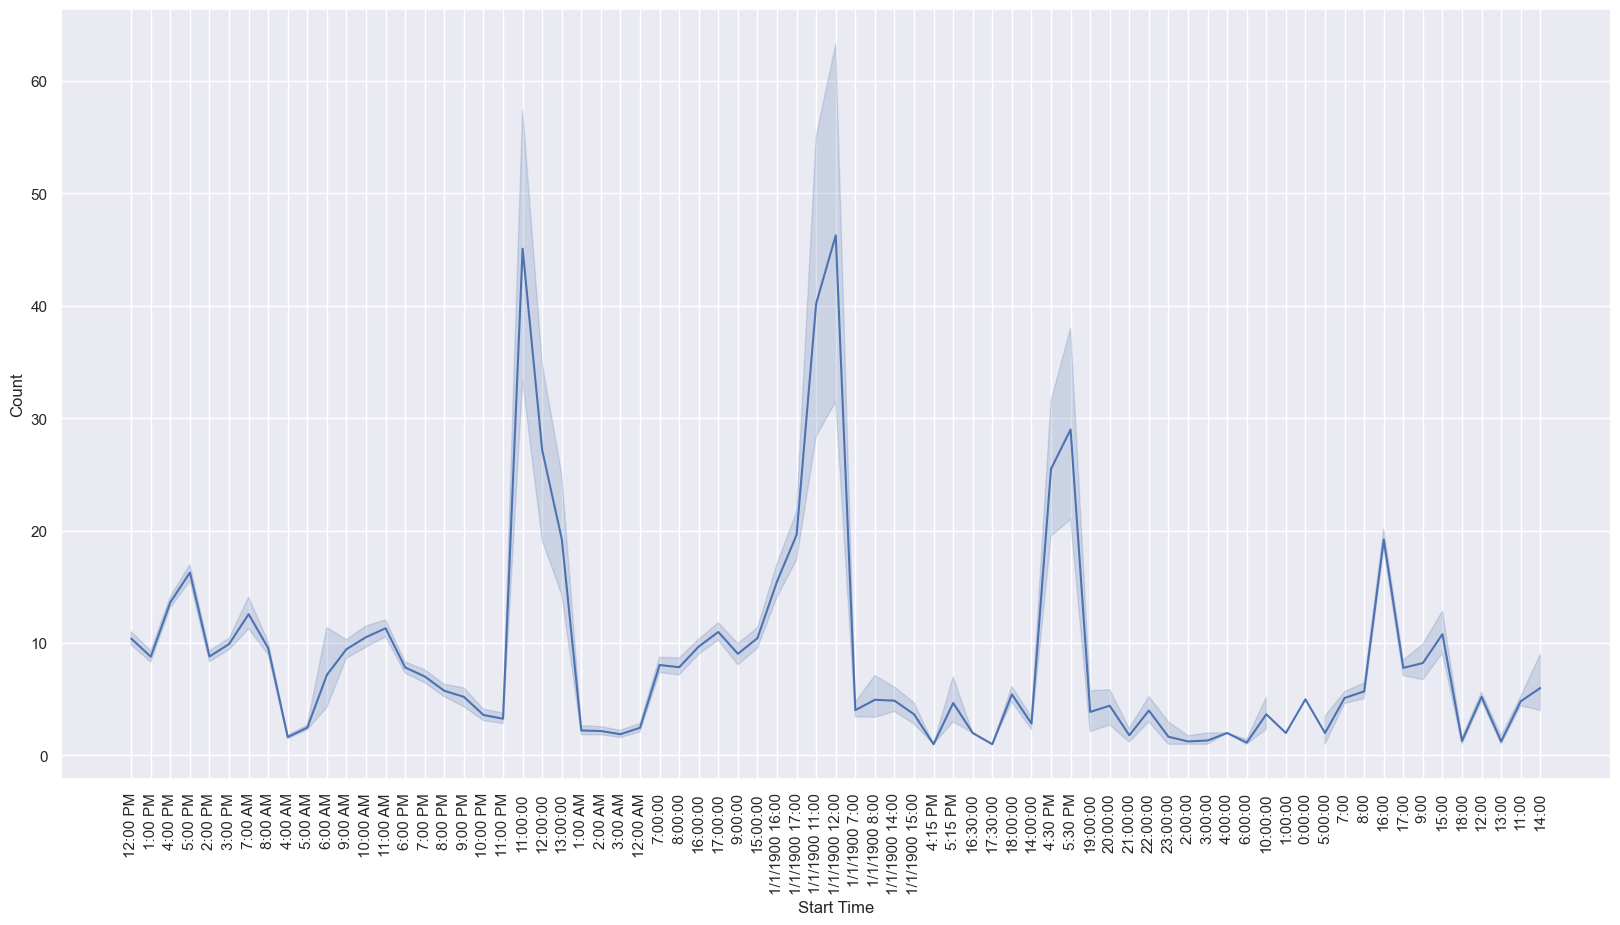

In [8]:
#sns.set(font_scale=1.5)
sns.set(rc={'figure.figsize':(20,10)})
sns.color_palette("husl", 12)
sns.lineplot(
    data=sc_data,
    x="Start Time", y="Count",
    markers=True, dashes=False,sort=True)
plt.xticks(rotation = 'vertical')
plt.show()

In [9]:
# it seems the time is not clean, the time column needs to be fixed and bring a single format instead of AM, PM and 24-hrs format, therefore clean the data

In [10]:
# separate the data by differnt time format to do corrections
sc_data1_am = sc_data[sc_data['Start Time'].str.contains('AM')]
sc_data1_pm = sc_data[sc_data['Start Time'].str.contains('PM')]
sc_data2 = sc_data[sc_data['Start Time'].str.contains(':00:00')]
sc_data3 = sc_data[sc_data['Start Time'].str.contains('/')]
sc_data4 = sc_data[sc_data['Start Time'].str.contains(':30:00')]
sc_data4 .head()

,Unnamed: 0.1,Unnamed: 0,ID,Date,Day of Week,Start Time,End Time,Count,Leg,matched_seg_id,date,month,year,day,dayofweek,weekday_Status,Week Day Status
26576,26576,1027,SLO_Co106,2014-11-04,Tuesday,16:30:00,17:30:00,2,E,110406,2014-11-04,11.00,2014.00,4.00,1.00,0,Week Day
26577,26577,1028,SLO_Co106,2014-11-04,Tuesday,17:30:00,18:30:00,1,E,110406,2014-11-04,11.00,2014.00,4.00,1.00,0,Week Day
26578,26578,1029,SLO_Co106,2014-11-04,Tuesday,16:30:00,17:30:00,2,W,111744,2014-11-04,11.00,2014.00,4.00,1.00,0,Week Day
26579,26579,1030,SLO_Co106,2014-11-04,Tuesday,17:30:00,18:30:00,1,W,111744,2014-11-04,11.00,2014.00,4.00,1.00,0,Week Day


In [11]:
ii=pd.concat([sc_data1_am,sc_data1_pm,sc_data2,sc_data3,sc_data4],axis=0)
i1 = pd.MultiIndex.from_frame(sc_data)
i2 = pd.MultiIndex.from_frame(ii)
sc_data5=sc_data[~i1.isin(i2)]
sc_data5.head()

,Unnamed: 0.1,Unnamed: 0,ID,Date,Day of Week,Start Time,End Time,Count,Leg,matched_seg_id,date,month,year,day,dayofweek,weekday_Status,Week Day Status
39893,39893,9718,Eric_Fischer0,2012-05-23,Wednesday,7:00,8:00,22,N,105298,2012-05-23,5.00,2012.00,23.00,2.00,0,Week Day
39894,39894,9719,Eric_Fischer0,2012-05-23,Wednesday,7:00,8:00,9,E,bearing calculation not match with TMS count,2012-05-23,5.00,2012.00,23.00,2.00,0,Week Day
39895,39895,9720,Eric_Fischer0,2012-05-23,Wednesday,7:00,8:00,1,S,105262,2012-05-23,5.00,2012.00,23.00,2.00,0,Week Day
39896,39896,9721,Eric_Fischer0,2012-05-23,Wednesday,7:00,8:00,5,W,105340,2012-05-23,5.00,2012.00,23.00,2.00,0,Week Day
39897,39897,9722,Eric_Fischer0,2012-05-23,Wednesday,8:00,9:00,16,N,105298,2012-05-23,5.00,2012.00,23.00,2.00,0,Week Day


In [12]:
sc_data5['starttime'] = pd.to_datetime(sc_data5['Start Time'], format='%H:%M').dt.strftime('%H:%M:%S')
sc_data5.tail()

C:\Users\mmmiah\AppData\Local\Temp\ipykernel_17936\1900554007.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sc_data5['starttime'] = pd.to_datetime(sc_data5['Start Time'], format='%H:%M').dt.strftime('%H:%M:%S')


,Unnamed: 0.1,Unnamed: 0,ID,Date,Day of Week,Start Time,End Time,Count,Leg,matched_seg_id,date,month,year,day,dayofweek,weekday_Status,Week Day Status,starttime
47719,47719,17544,Eric_Fischer1445,2013-05-01,Wednesday,8:00,9:00,8,S,bearing calculation not match with TMS count,2013-05-01,5.00,2013.00,1.00,2.00,0,Week Day,08:00:00
47720,47720,17545,Eric_Fischer1445,2013-05-01,Wednesday,14:00,15:00,5,N,bearing calculation not match with TMS count,2013-05-01,5.00,2013.00,1.00,2.00,0,Week Day,14:00:00
47721,47721,17546,Eric_Fischer1445,2013-05-01,Wednesday,14:00,15:00,4,S,bearing calculation not match with TMS count,2013-05-01,5.00,2013.00,1.00,2.00,0,Week Day,14:00:00
47722,47722,17547,Eric_Fischer1445,2013-05-01,Wednesday,15:00,16:00,4,N,bearing calculation not match with TMS count,2013-05-01,5.00,2013.00,1.00,2.00,0,Week Day,15:00:00
47723,47723,17548,Eric_Fischer1445,2013-05-01,Wednesday,15:00,16:00,9,S,bearing calculation not match with TMS count,2013-05-01,5.00,2013.00,1.00,2.00,0,Week Day,15:00:00


In [13]:
sc_data5['endtime'] = pd.to_datetime(sc_data5['End Time'].str.replace('24:','00:'))
sc_data5['endtime'] = pd.to_datetime(sc_data5['endtime']).dt.strftime('%H:%M:%S')
sc_data5.head()

C:\Users\mmmiah\AppData\Local\Temp\ipykernel_17936\3924838247.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sc_data5['endtime'] = pd.to_datetime(sc_data5['End Time'].str.replace('24:','00:'))
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_17936\3924838247.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sc_data5['endtime'] = pd.to_datetime(sc_data5['endtime']).dt.strftime('%H:%M:%S')


,Unnamed: 0.1,Unnamed: 0,ID,Date,Day of Week,Start Time,End Time,Count,Leg,matched_seg_id,date,month,year,day,dayofweek,weekday_Status,Week Day Status,starttime,endtime
39893,39893,9718,Eric_Fischer0,2012-05-23,Wednesday,7:00,8:00,22,N,105298,2012-05-23,5.00,2012.00,23.00,2.00,0,Week Day,07:00:00,08:00:00
39894,39894,9719,Eric_Fischer0,2012-05-23,Wednesday,7:00,8:00,9,E,bearing calculation not match with TMS count,2012-05-23,5.00,2012.00,23.00,2.00,0,Week Day,07:00:00,08:00:00
39895,39895,9720,Eric_Fischer0,2012-05-23,Wednesday,7:00,8:00,1,S,105262,2012-05-23,5.00,2012.00,23.00,2.00,0,Week Day,07:00:00,08:00:00
39896,39896,9721,Eric_Fischer0,2012-05-23,Wednesday,7:00,8:00,5,W,105340,2012-05-23,5.00,2012.00,23.00,2.00,0,Week Day,07:00:00,08:00:00
39897,39897,9722,Eric_Fischer0,2012-05-23,Wednesday,8:00,9:00,16,N,105298,2012-05-23,5.00,2012.00,23.00,2.00,0,Week Day,08:00:00,09:00:00


In [14]:
sc_data.shape,sc_data1_am.shape,sc_data1_pm.shape,sc_data2.shape,sc_data3.shape,sc_data4.shape,sc_data5.shape

((50713, 17),
 (12987, 17),
 (23959, 17),
 (4090, 17),
 (1842, 17),
 (4, 17),
 (7831, 19))

In [15]:
sc_data1_am['starttime'] = pd.to_datetime(sc_data1_am['Start Time']).dt.strftime('%H:%M:%S')
sc_data1_am['endtime'] = pd.to_datetime(sc_data1_am['End Time']).dt.strftime('%H:%M:%S')
sc_data1_pm['starttime'] = pd.to_datetime(sc_data1_pm['Start Time']).dt.strftime('%H:%M:%S')
sc_data1_pm['endtime'] = pd.to_datetime(sc_data1_pm['End Time']).dt.strftime('%H:%M:%S')
sc_data5.head()

C:\Users\mmmiah\AppData\Local\Temp\ipykernel_17936\3023022608.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sc_data1_am['starttime'] = pd.to_datetime(sc_data1_am['Start Time']).dt.strftime('%H:%M:%S')
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_17936\3023022608.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sc_data1_am['endtime'] = pd.to_datetime(sc_data1_am['End Time']).dt.strftime('%H:%M:%S')
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_17936\3023022608.py:3: SettingWithCopyWarning: 
A value i

,Unnamed: 0.1,Unnamed: 0,ID,Date,Day of Week,Start Time,End Time,Count,Leg,matched_seg_id,date,month,year,day,dayofweek,weekday_Status,Week Day Status,starttime,endtime
39893,39893,9718,Eric_Fischer0,2012-05-23,Wednesday,7:00,8:00,22,N,105298,2012-05-23,5.00,2012.00,23.00,2.00,0,Week Day,07:00:00,08:00:00
39894,39894,9719,Eric_Fischer0,2012-05-23,Wednesday,7:00,8:00,9,E,bearing calculation not match with TMS count,2012-05-23,5.00,2012.00,23.00,2.00,0,Week Day,07:00:00,08:00:00
39895,39895,9720,Eric_Fischer0,2012-05-23,Wednesday,7:00,8:00,1,S,105262,2012-05-23,5.00,2012.00,23.00,2.00,0,Week Day,07:00:00,08:00:00
39896,39896,9721,Eric_Fischer0,2012-05-23,Wednesday,7:00,8:00,5,W,105340,2012-05-23,5.00,2012.00,23.00,2.00,0,Week Day,07:00:00,08:00:00
39897,39897,9722,Eric_Fischer0,2012-05-23,Wednesday,8:00,9:00,16,N,105298,2012-05-23,5.00,2012.00,23.00,2.00,0,Week Day,08:00:00,09:00:00


In [16]:
sc_data3[[ "date", "starttime1"]] = sc_data3["Start Time"].str.split(" ", expand = True)
sc_data3[[ "date", "endtime1"]] = sc_data3["End Time"].str.split(" ", expand = True)
sc_data3['starttime'] = pd.to_datetime(sc_data3['starttime1']).dt.strftime('%H:%M:%S')
sc_data3['endtime'] = pd.to_datetime(sc_data3['endtime1']).dt.strftime('%H:%M:%S')
sc_data3.head()

C:\Users\mmmiah\AppData\Local\Temp\ipykernel_17936\3131652097.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sc_data3[[ "date", "starttime1"]] = sc_data3["Start Time"].str.split(" ", expand = True)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_17936\3131652097.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sc_data3[[ "date", "starttime1"]] = sc_data3["Start Time"].str.split(" ", expand = True)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_17936\3131652097.py:2: SettingWithCopyWarning: 
A value is tr

,Unnamed: 0.1,Unnamed: 0,ID,Date,Day of Week,Start Time,End Time,Count,Leg,matched_seg_id,...,month,year,day,dayofweek,weekday_Status,Week Day Status,starttime1,endtime1,starttime,endtime
18752,18752,0,SCC0,2014-10-16,Thursday,1/1/1900 16:00,1/1/1900 17:00,85,N,117219,...,10.00,2014.00,16.00,3.00,0,Week Day,16:00,17:00,16:00:00,17:00:00
18753,18753,1,SCC0,2014-10-16,Thursday,1/1/1900 17:00,1/1/1900 18:00,157,N,117219,...,10.00,2014.00,16.00,3.00,0,Week Day,17:00,18:00,17:00:00,18:00:00
18754,18754,2,SCC0,2014-10-16,Thursday,1/1/1900 16:00,1/1/1900 17:00,39,E,bearing calculation not match with TMS count,...,10.00,2014.00,16.00,3.00,0,Week Day,16:00,17:00,16:00:00,17:00:00
18755,18755,3,SCC0,2014-10-16,Thursday,1/1/1900 17:00,1/1/1900 18:00,63,E,bearing calculation not match with TMS count,...,10.00,2014.00,16.00,3.00,0,Week Day,17:00,18:00,17:00:00,18:00:00
18756,18756,4,SCC0,2014-10-16,Thursday,1/1/1900 16:00,1/1/1900 17:00,58,S,117987,...,10.00,2014.00,16.00,3.00,0,Week Day,16:00,17:00,16:00:00,17:00:00


In [17]:
sc_data2['starttime'] = sc_data2['Start Time']
sc_data2['endtime'] = sc_data2['End Time']
sc_data4['starttime'] = sc_data4['Start Time']
sc_data4['endtime'] = sc_data4['End Time']

C:\Users\mmmiah\AppData\Local\Temp\ipykernel_17936\395632020.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sc_data2['starttime'] = sc_data2['Start Time']
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_17936\395632020.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sc_data2['endtime'] = sc_data2['End Time']
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_17936\395632020.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

In [18]:
sc_data_all=pd.concat([sc_data1_am,sc_data1_pm,sc_data2,sc_data3,sc_data4,sc_data5],axis=0)
sc_data_all.shape

(50713, 21)

In [19]:
# Calculate the time duration of data collection by each segments
sc_data_all['startDateTime'] = sc_data_all['Date'] + pd.to_timedelta(sc_data_all.starttime)
sc_data_all['endDateTime'] = sc_data_all['Date'] +  pd.to_timedelta(sc_data_all['endtime'].astype(str))
sc_data_all['diff']=abs(sc_data_all.endDateTime-sc_data_all.startDateTime).astype('timedelta64[h]')
sc_data_all.head()

,Unnamed: 0.1,Unnamed: 0,ID,Date,Day of Week,Start Time,End Time,Count,Leg,matched_seg_id,...,dayofweek,weekday_Status,Week Day Status,starttime,endtime,starttime1,endtime1,startDateTime,endDateTime,diff
3432,3432,0,CH0,2018-05-30,Wednesday,7:00 AM,8:00 AM,4,N,90150,...,2.00,0,Week Day,07:00:00,08:00:00,NaN,NaN,2018-05-30 07:00:00,2018-05-30 08:00:00,1.00
3433,3433,1,CH0,2018-05-30,Wednesday,8:00 AM,9:00 AM,4,N,90150,...,2.00,0,Week Day,08:00:00,09:00:00,NaN,NaN,2018-05-30 08:00:00,2018-05-30 09:00:00,1.00
3438,3438,6,CH0,2018-05-30,Wednesday,7:00 AM,8:00 AM,1,E,89862,...,2.00,0,Week Day,07:00:00,08:00:00,NaN,NaN,2018-05-30 07:00:00,2018-05-30 08:00:00,1.00
3442,3442,10,CH0,2018-05-30,Wednesday,7:00 AM,8:00 AM,3,S,89555,...,2.00,0,Week Day,07:00:00,08:00:00,NaN,NaN,2018-05-30 07:00:00,2018-05-30 08:00:00,1.00
3443,3443,11,CH0,2018-05-30,Wednesday,8:00 AM,9:00 AM,4,S,89555,...,2.00,0,Week Day,08:00:00,09:00:00,NaN,NaN,2018-05-30 08:00:00,2018-05-30 09:00:00,1.00


In [20]:
sc_data_all.groupby(['year'])['ID'].count()

year
2009.00        1
2010.00     3909
2011.00     1967
2012.00     2867
2013.00     1724
2014.00     3616
2015.00     3224
2016.00    14450
2017.00     5281
2018.00     7316
2019.00     5062
2020.00     1277
2106.00       12
Name: ID, dtype: int64

In [21]:
# take only 2014 to 2019 data
sc_data_all_4=sc_data_all[(sc_data_all['year']>2013) & (sc_data_all['year']<2020)]
sc_data_all_4.head()

,Unnamed: 0.1,Unnamed: 0,ID,Date,Day of Week,Start Time,End Time,Count,Leg,matched_seg_id,...,dayofweek,weekday_Status,Week Day Status,starttime,endtime,starttime1,endtime1,startDateTime,endDateTime,diff
3432,3432,0,CH0,2018-05-30,Wednesday,7:00 AM,8:00 AM,4,N,90150,...,2.00,0,Week Day,07:00:00,08:00:00,NaN,NaN,2018-05-30 07:00:00,2018-05-30 08:00:00,1.00
3433,3433,1,CH0,2018-05-30,Wednesday,8:00 AM,9:00 AM,4,N,90150,...,2.00,0,Week Day,08:00:00,09:00:00,NaN,NaN,2018-05-30 08:00:00,2018-05-30 09:00:00,1.00
3438,3438,6,CH0,2018-05-30,Wednesday,7:00 AM,8:00 AM,1,E,89862,...,2.00,0,Week Day,07:00:00,08:00:00,NaN,NaN,2018-05-30 07:00:00,2018-05-30 08:00:00,1.00
3442,3442,10,CH0,2018-05-30,Wednesday,7:00 AM,8:00 AM,3,S,89555,...,2.00,0,Week Day,07:00:00,08:00:00,NaN,NaN,2018-05-30 07:00:00,2018-05-30 08:00:00,1.00
3443,3443,11,CH0,2018-05-30,Wednesday,8:00 AM,9:00 AM,4,S,89555,...,2.00,0,Week Day,08:00:00,09:00:00,NaN,NaN,2018-05-30 08:00:00,2018-05-30 09:00:00,1.00


In [22]:
sc_data_all_4['ID'].nunique()

2858

In [23]:
sc_data_all_4.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'ID', 'Date', 'Day of Week', 'Start Time',
       'End Time', 'Count', 'Leg', 'matched_seg_id', 'date', 'month', 'year',
       'day', 'dayofweek', 'weekday_Status', 'Week Day Status', 'starttime',
       'endtime', 'starttime1', 'endtime1', 'startDateTime', 'endDateTime',
       'diff'],
      dtype='object')

In [24]:
# remove the data that does not have matched segment id
sc_data_all_41=sc_data_all_4.loc[sc_data_all_4.matched_seg_id.str.isnumeric()]
# get only unique counters
sc_data_all_41u=sc_data_all_41.drop_duplicates(subset=['ID','Leg','matched_seg_id','year'], keep='first')
sc_data_all_41u.shape

(6816, 24)

In [33]:
sc_data_all_41.groupby(['year'])['ID'].count()

year
2014.00    1466
2015.00    2731
2016.00    8983
2017.00    4766
2018.00    6395
2019.00    3958
Name: ID, dtype: int64

In [34]:
# save this data
sc_data_all_41.to_csv('H:/Desktop/Bike_ped Exposure Model Project/Processed Data/short_term_clean_data_2014_2019.csv')
#sc_data_all.to_csv('C:/UC Berkeley Project Backup/Bike_ped Exposure Model Project/Processed Data/short_term_clean_data_2009_2020.csv')

In [27]:
sc_data_all_41u.to_csv('H:/Desktop/Bike_ped Exposure Model Project/Processed Data/short_term_clean_data_2014_2019_unique_location.csv')

In [28]:
#check the duration of short term data collection
dc_dur=pd.DataFrame({'data_collection_duration':sc_data_all_41.groupby(['ID','Leg','year'])['diff'].sum()}).reset_index()
dc_dur.head()

,ID,Leg,year,data_collection_duration
0,AC20160,E,2016.00,4.00
1,AC20160,N,2016.00,4.00
2,AC20160,S,2016.00,4.00
3,AC20160,W,2016.00,4.00
4,AC20161,E,2016.00,2.00


In [29]:
dc_dur.groupby(['year'])['ID'].nunique()

year
2014.00    240
2015.00    333
2016.00    756
2017.00    412
2018.00    581
2019.00    307
Name: ID, dtype: int64

In [23]:
dc_dur[(dc_dur['data_collection_duration']>12) & (dc_dur['data_collection_duration']<=24)].shape

(184, 4)

In [24]:
dc_dur.loc[dc_dur['data_collection_duration']>24].shape

(67, 4)

In [25]:
# How many short term sites have weekend data
sc_data_all_4.head()

,Unnamed: 0.1,Unnamed: 0,ID,Date,Day of Week,Start Time,End Time,Count,Leg,matched_seg_id,...,dayofweek,weekday_Status,Week Day Status,starttime,endtime,starttime1,endtime1,startDateTime,endDateTime,diff
3432,3432,0,CH0,2018-05-30,Wednesday,7:00 AM,8:00 AM,4,N,90150,...,2.00,0,Week Day,07:00:00,08:00:00,NaN,NaN,2018-05-30 07:00:00,2018-05-30 08:00:00,1.00
3433,3433,1,CH0,2018-05-30,Wednesday,8:00 AM,9:00 AM,4,N,90150,...,2.00,0,Week Day,08:00:00,09:00:00,NaN,NaN,2018-05-30 08:00:00,2018-05-30 09:00:00,1.00
3438,3438,6,CH0,2018-05-30,Wednesday,7:00 AM,8:00 AM,1,E,89862,...,2.00,0,Week Day,07:00:00,08:00:00,NaN,NaN,2018-05-30 07:00:00,2018-05-30 08:00:00,1.00
3442,3442,10,CH0,2018-05-30,Wednesday,7:00 AM,8:00 AM,3,S,89555,...,2.00,0,Week Day,07:00:00,08:00:00,NaN,NaN,2018-05-30 07:00:00,2018-05-30 08:00:00,1.00
3443,3443,11,CH0,2018-05-30,Wednesday,8:00 AM,9:00 AM,4,S,89555,...,2.00,0,Week Day,08:00:00,09:00:00,NaN,NaN,2018-05-30 08:00:00,2018-05-30 09:00:00,1.00


In [26]:
sat_sun=sc_data_all_4.loc[sc_data_all_4['Week Day Status']=='Weekend']
sat_sun.head()

,Unnamed: 0.1,Unnamed: 0,ID,Date,Day of Week,Start Time,End Time,Count,Leg,matched_seg_id,...,dayofweek,weekday_Status,Week Day Status,starttime,endtime,starttime1,endtime1,startDateTime,endDateTime,diff
4676,4676,446,Kern7,2016-12-17,Saturday,7:00 AM,8:00 AM,4,N,28756,...,5.00,1,Weekend,07:00:00,08:00:00,NaN,NaN,2016-12-17 07:00:00,2016-12-17 08:00:00,1.00
4677,4677,447,Kern7,2016-12-17,Saturday,8:00 AM,9:00 AM,1,N,28756,...,5.00,1,Weekend,08:00:00,09:00:00,NaN,NaN,2016-12-17 08:00:00,2016-12-17 09:00:00,1.00
4678,4678,448,Kern7,2016-12-17,Saturday,9:00 AM,10:00 AM,2,N,28756,...,5.00,1,Weekend,09:00:00,10:00:00,NaN,NaN,2016-12-17 09:00:00,2016-12-17 10:00:00,1.00
4679,4679,449,Kern7,2016-12-17,Saturday,10:00 AM,11:00 AM,4,N,28756,...,5.00,1,Weekend,10:00:00,11:00:00,NaN,NaN,2016-12-17 10:00:00,2016-12-17 11:00:00,1.00
4813,4813,583,Kern108,2017-09-17,Sunday,7:00 AM,8:00 AM,14,N,26336,...,6.00,1,Weekend,07:00:00,08:00:00,NaN,NaN,2017-09-17 07:00:00,2017-09-17 08:00:00,1.00


In [27]:
sat_sun['ID'].nunique()

266

In [32]:
sat_sun.groupby(['starttime'])['ID'].nunique()

starttime
00:00:00     10
01:00:00      5
02:00:00      4
03:00:00      2
04:00:00      5
05:00:00      3
06:00:00     56
07:00:00     89
08:00:00     92
09:00:00     82
10:00:00    114
11:00:00    138
12:00:00    124
13:00:00    109
14:00:00    100
15:00:00     83
16:00:00    155
17:00:00    139
18:00:00     59
19:00:00     29
20:00:00     15
21:00:00     14
22:00:00     10
23:00:00      7
Name: ID, dtype: int64

# end of the data Processing